# **Installing/Importing essential Libraries**

In [0]:
import warnings
warnings.simplefilter("ignore")

In [2]:
!pip install pyaudioanalysis

     |████████████████████████████████| 51kB 933kB/s 
  Created wheel for pyaudioanalysis: filename=pyAudioAnalysis-0.3.0-cp36-none-any.whl size=49830 sha256=9ee3e1b64023e47765475626e0e4961f2873804de145cb2e9a267db4db164685
  Stored in directory: /root/.cache/pip/wheels/0a/ae/82/a403b29ed85f5be45844c56d77fc9e8ab8c923a7f6295b8fdf
Successfully built pyaudioanalysis


In [3]:
!pip install eyed3 pydub hmmlearn simplejson

     |████████████████████████████████| 153kB 1.4MB/s 
     |████████████████████████████████| 368kB 44.7MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114216 sha256=40ea25638c16f10c0d538ef68a5154aeb8d7a8880639c0ae42ce2e5574cc1c4d
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson


In [4]:
!wget https://raw.githubusercontent.com/tyiannak/pyAudioAnalysis/master/pyAudioAnalysis/data/diarizationExample.wav

--2020-04-07 15:28:13--  https://raw.githubusercontent.com/tyiannak/pyAudioAnalysis/master/pyAudioAnalysis/data/diarizationExample.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343534 (1.3M) [audio/wav]
Saving to: ‘diarizationExample.wav’

diarizationExample. 100%[===================>]   1.28M  4.17MB/s    in 0.3s    

2020-04-07 15:28:14 (4.17 MB/s) - ‘diarizationExample.wav’ saved [1343534/1343534]



In [5]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git

Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 2278 (delta 36), reused 44 (delta 17), pack-reused 2209
Receiving objects: 100% (2278/2278), 134.56 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (1391/1391), done.


In [6]:
import shutil
shutil.copytree("/content/pyAudioAnalysis/pyAudioAnalysis/data", "/usr/local/lib/python3.6/dist-packages/pyAudioAnalysis/data")

'/usr/local/lib/python3.6/dist-packages/pyAudioAnalysis/data'

# **Diarization Process**

**Visual Represntation of homogenous segments**

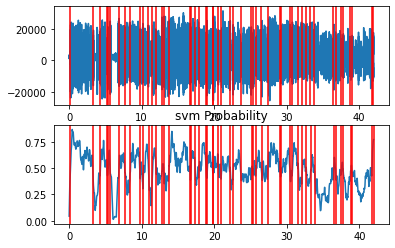

In [7]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
[Fs, x] = aIO.read_audio_file("/content/diarizationExample.wav")
segments = aS.silence_removal(x, Fs, 0.020, 0.020, plot = True)

**Identifying Speaker class each 20ms(window size)**

In [0]:
miniutes_of_speaker = aS.speaker_diarization('/content/diarizationExample.wav',4)

In [9]:
miniutes_of_speaker

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [10]:
for i in range(len(miniutes_of_speaker)):
  if i == 0:
    start_time = 0
  current_speaker = miniutes_of_speaker[i]
  if i!= 0 and current_speaker != miniutes_of_speaker[i-1]:
    end_time = i-1
    print('Speaker %d'%miniutes_of_speaker[i-1] + ': ' + '%.2f'%(start_time*0.2) + ' - ' + '%.2f'%(end_time*0.2))
    start_time = end_time + 1
    print()
print('Speaker %d'%miniutes_of_speaker[i-1] + ': ' + '%.2f'%(start_time*0.2) + ' - ' + '%.2f'%(len(miniutes_of_speaker)*0.2))

Speaker 2: 0.00 - 9.20

Speaker 0: 9.40 - 14.80

Speaker 3: 15.00 - 16.80

Speaker 0: 17.00 - 19.20

Speaker 3: 19.40 - 30.00

Speaker 2: 30.20 - 30.20

Speaker 1: 30.40 - 42.00


**Visual Representation of the following (Class Name may differ)**

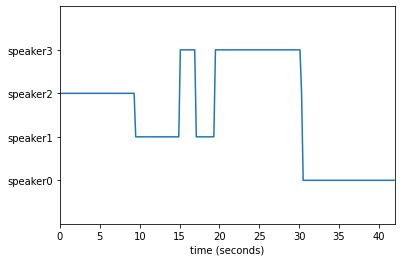

In [11]:
from pyAudioAnalysis import audioAnalysis as aA
aA.speakerDiarizationWrapper('/content/diarizationExample.wav',4,useLDA=1)